<a href="https://colab.research.google.com/github/ummadiviany/MachineLearning/blob/master/Feauture_Selection%2CFE%2CDR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Mounted at /content/gdrive
Mounted at /content/gdrive


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
columns=['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','num']
df=pd.read_csv('/content/gdrive/My Drive/heart/repheha.csv',names=columns)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 14 columns):
age         294 non-null int64
sex         294 non-null int64
cp          294 non-null int64
trestbps    294 non-null int64
chol        294 non-null int64
fbs         294 non-null int64
restecg     294 non-null int64
thalach     294 non-null int64
exang       294 non-null int64
oldpeak     294 non-null float64
slope       294 non-null int64
ca          294 non-null int64
thal        294 non-null int64
num         294 non-null int64
dtypes: float64(1), int64(13)
memory usage: 32.2 KB


In [7]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.00000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000
mean,47.826531,0.724490,2.982993,132.102041,230.520408,-0.176871,0.187075,138.62585,0.272109,0.586054,-5.146259,-8.846939,-7.605442,0.792517
std,7.811812,0.447533,0.965117,19.437564,95.414336,1.499491,0.707616,25.08408,0.711273,0.908648,5.221611,1.382623,4.333468,1.237006
min,28.000000,0.000000,1.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.00000,-9.000000,0.000000,-9.000000,-9.000000,-9.000000,0.000000
25%,42.000000,0.000000,2.000000,120.000000,198.000000,0.000000,0.000000,122.00000,0.000000,0.000000,-9.000000,-9.000000,-9.000000,0.000000
50%,49.000000,1.000000,3.000000,130.000000,237.000000,0.000000,0.000000,140.00000,0.000000,0.000000,-9.000000,-9.000000,-9.000000,0.000000
75%,54.000000,1.000000,4.000000,140.000000,277.000000,0.000000,0.000000,155.00000,1.000000,1.000000,2.000000,-9.000000,-9.000000,1.000000
max,66.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,190.00000,1.000000,5.000000,3.000000,9.000000,7.000000,4.000000


In [0]:
x = df.drop(columns=['num'],axis=1)
y = df['num']

In [0]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [0]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier()

In [11]:
model.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [12]:
model.score(x_train,y_train)

0.6808510638297872

In [13]:
model.score(x_test,y_test)

0.6271186440677966

In [0]:
from sklearn.model_selection import GridSearchCV
knn=KNeighborsClassifier()
from sklearn.preprocessing import StandardScaler,Normalizer
scaler=StandardScaler()
norm=Normalizer()

In [0]:
parameters={'n_neighbors':[1,2,3,4,5,6,7,8,9,10]}

searcher=GridSearchCV(knn,parameters)

In [16]:
searcher.fit(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [17]:
searcher.best_params_

{'n_neighbors': 8}

In [18]:
searcher.score(x_train,y_train)

0.6425531914893617

In [19]:
searcher.score(x_test,y_test)

0.6440677966101694

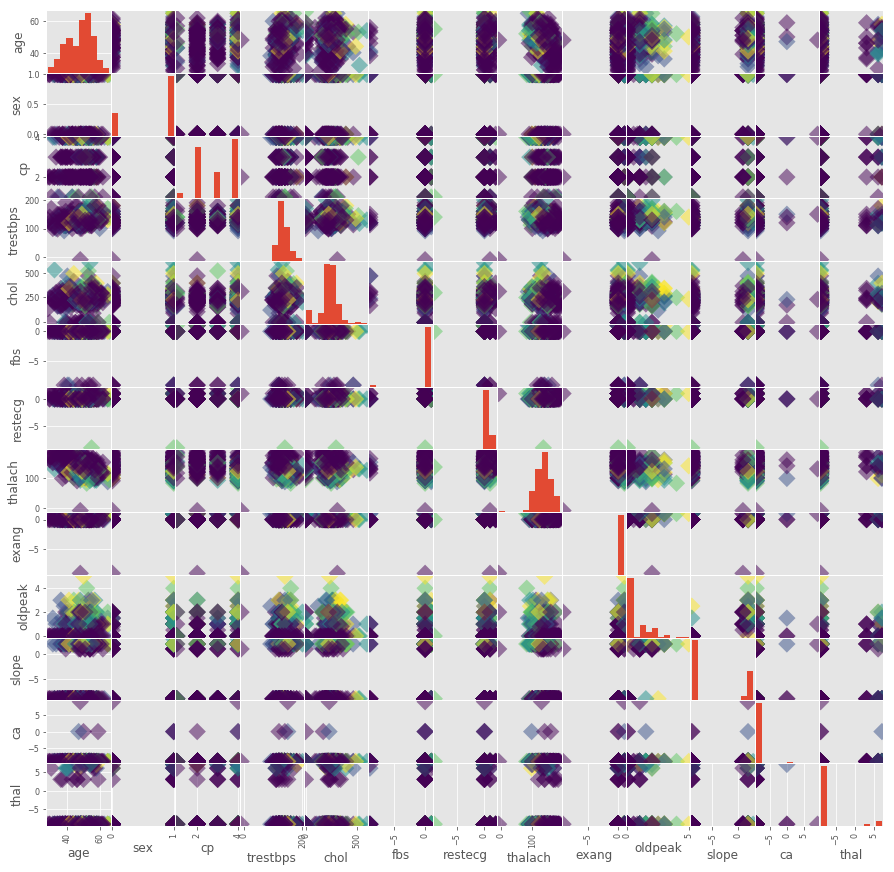

In [20]:
plt.style.use('ggplot')
_ = pd.plotting.scatter_matrix(x, c = y, figsize = [15, 15],s=150, marker = 'D')

In [21]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(multi_class='auto')

lr.fit(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [22]:
lr.score(x_train,y_train)

0.7191489361702128

In [23]:
lr.score(x_test,y_test)

0.6610169491525424

In [0]:
from sklearn.preprocessing import normalize
x_norm_train=normalize(x_train)
x_norm_test=normalize(x_test)

In [25]:
lr.fit(x_norm_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [26]:
lr.score(x_norm_train,y_train)

0.6382978723404256

In [27]:
lr.score(x_norm_test,y_test)

0.6440677966101694

In [28]:
model.fit(x_norm_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [29]:
model.score(x_norm_train,y_train)

0.6978723404255319

In [30]:
model.score(x_norm_test,y_test)

0.6440677966101694

In [31]:
from sklearn.model_selection import cross_val_score
cvres=cross_val_score(lr,x_train,y_train,cv=20)
print("CV Scores     :",cvres)
print("Mean:  ",np.mean(cvres))
print("Max     :",np.max(cvres))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 14 members, which is too few. The minimum number of members in any class cannot be less than n_splits=20.
  % (min_groups, self.n_splits)), Warning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be cha

CV Scores     : [0.64285714 0.5        0.64285714 0.61538462 0.76923077 0.53846154
 0.69230769 0.61538462 0.66666667 0.75       0.54545455 0.63636364
 0.63636364 0.81818182 0.7        0.7        0.8        0.5
 0.9        0.7       ]
Mean:   0.668475690975691
Max     : 0.9


In [32]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
y_pred=lr.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[38  0  0  0  0]
 [ 9  0  0  0  0]
 [ 5  1  0  0  0]
 [ 4  1  0  0  0]
 [ 1  0  0  0  0]]
              precision    recall  f1-score   support

           0       0.67      1.00      0.80        38
           1       0.00      0.00      0.00         9
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00         1

    accuracy                           0.64        59
   macro avg       0.13      0.20      0.16        59
weighted avg       0.43      0.64      0.52        59



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [33]:
from sklearn.preprocessing import scale
x_train_scaled=scale(x_train)
x_test_scaled=scale(x_test)
print("Mean without Standardization",np.mean(x_train),"Std without standization",np.std(x_train))
print("Mean with Standardization",np.mean(x_train_scaled),"Std with standization",np.std(x_train_scaled))

Mean without Standardization age          48.195745
sex           0.714894
cp            2.991489
trestbps    131.604255
chol        231.812766
fbs          -0.195745
restecg       0.208511
thalach     137.204255
exang         0.285106
oldpeak       0.628936
slope        -4.880851
ca           -8.808511
thal         -7.557447
dtype: float64 Std without standization age          7.794978
sex          0.451465
cp           0.971910
trestbps    19.296367
chol        95.107101
fbs          1.564222
restecg      0.774000
thalach     25.082010
exang        0.766028
oldpeak      0.934409
slope        5.279694
ca           1.541460
thal         4.405014
dtype: float64
Mean with Standardization -1.7443766017023736e-17 Std with standization 1.0


In [34]:
lr.fit(x_train_scaled,y_train)
print(lr.score(x_test_scaled,y_test))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.6440677966101694


In [35]:
df['num'].value_counts()

0    188
1     37
3     28
2     26
4     15
Name: num, dtype: int64

In [36]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
num           int64
dtype: object

In [37]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [38]:
from sklearn.cluster import KMeans

kmeans=KMeans(n_clusters=5)
kmeans.fit(x_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [0]:
labelspred=kmeans.predict(x_test_scaled)

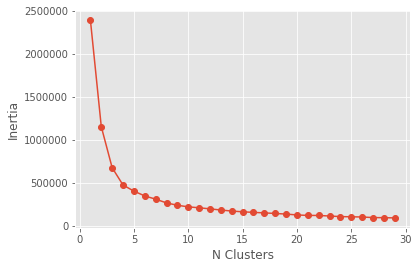

In [40]:
nc=np.arange(1,30)
inertia=list()
for n in nc:
  kmeans=KMeans(n_clusters=n)
  kmeans.fit(x_train)
  inertia.append(kmeans.inertia_)
plt.plot(nc,inertia,marker='o')
plt.xlabel("N Clusters")
plt.ylabel("Inertia")
plt.show()

In [41]:
print(labelspred)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [42]:
unique, counts = np.unique(labelspred, return_counts=True)

print (np.asarray((unique, counts)).T)

[[ 1 59]]


In [43]:
unique, counts = np.unique(y_test, return_counts=True)

print (np.asarray((unique, counts)).T)

[[ 0 38]
 [ 1  9]
 [ 2  6]
 [ 3  5]
 [ 4  1]]


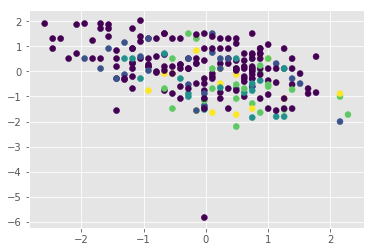

In [44]:
xs=x_train_scaled[:,0]
ys=x_train_scaled[:,7]
plt.scatter(xs,ys,c=y_train)
plt.show()

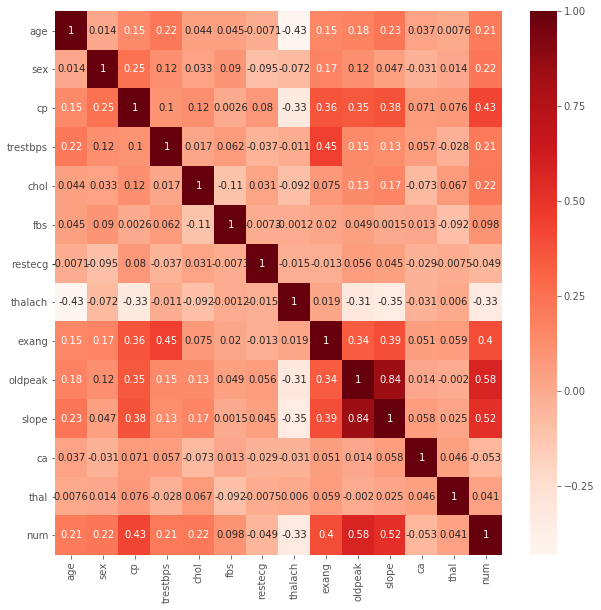

In [45]:
#Using Pearson Correlation
import seaborn as sns
plt.figure(figsize=(10,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [46]:
cor_target = abs(cor["num"])#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.3]
print(relevant_features)

cp         0.428710
thalach    0.333257
exang      0.397985
oldpeak    0.581325
slope      0.520507
num        1.000000
Name: num, dtype: float64


In [47]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
bestfeatures=SelectKBest(score_func=chi2,k=10)
x1=x
x1[x1 < 0] = 0
fit=bestfeatures.fit(x1,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(5,'Score'))  #print 10 best features

      Specs       Score
4      chol  614.531123
7   thalach  159.173588
9   oldpeak  144.117197
10    slope  133.530978
8     exang   75.247258


[0.121958   0.03510429 0.10471982 0.11270167 0.12385579 0.02676814
 0.02904894 0.13150952 0.08578373 0.08400272 0.10119037 0.00307887
 0.04027816]


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


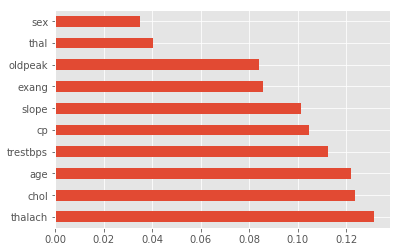

In [48]:
from sklearn.ensemble import ExtraTreesClassifier
etree=ExtraTreesClassifier()
etree.fit(x,y)
imp_fts=etree.feature_importances_
print(imp_fts)
feat_importances=pd.Series(imp_fts,index=x.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [0]:
x2_train=x_train#.drop(columns=['chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal'],axis=1)
x2_test=x_test#.drop(columns=['chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal'],axis=1)

In [50]:
x2_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
181,52,1,4,130,225,0,0,120,1,2.0,2,-9,-9
209,28,1,2,130,132,0,2,185,0,0.0,-9,-9,-9
168,48,1,2,140,238,0,0,118,0,0.0,-9,-9,-9
6,45,0,2,130,237,0,0,170,0,0.0,-9,-9,-9
224,33,1,3,120,298,0,0,185,0,0.0,-9,-9,-9


In [51]:
lr.fit(x2_train,y_train)
print("Logistic Regression",lr.score(x2_train,y_train))
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
rfc=RandomForestClassifier()
rfc.fit(x2_train,y_train)
print("Random Forest Classifier",rfc.score(x2_train,y_train))
from sklearn.ensemble import ExtraTreesClassifier
etc=ExtraTreesClassifier()
etc.fit(x2_train,y_train)
print("ExtraTreesClassifier",etc.score(x2_train,y_train))
abc=AdaBoostClassifier()
abc.fit(x2_train,y_train)
print("AdaBoostClassifier",abc.score(x2_train,y_train))
gbc=GradientBoostingClassifier()
gbc.fit(x2_train,y_train)
print("GradientBoostingClassifier",gbc.score(x2_train,y_train))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Logistic Regression 0.7191489361702128
Random Forest Classifier 0.9914893617021276
ExtraTreesClassifier 1.0
AdaBoostClassifier 0.7106382978723405
GradientBoostingClassifier 1.0


In [52]:
print("Logistic Regression",lr.score(x2_test,y_test))

print("Random Forest Classifier",rfc.score(x2_test,y_test))
print("ExtraTreesClassifier",etc.score(x2_test,y_test))
print("AdaBoostClassifier",abc.score(x2_test,y_test))
print("GradientBoostingClassifier",gbc.score(x2_test,y_test))

Logistic Regression 0.6610169491525424
Random Forest Classifier 0.6779661016949152
ExtraTreesClassifier 0.7288135593220338
AdaBoostClassifier 0.6779661016949152
GradientBoostingClassifier 0.6779661016949152


In [53]:
y_pred=lr.predict(x2_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

y_pred=rfc.predict(x2_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

y_pred=etc.predict(x2_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[37  1  0  0  0]
 [ 5  2  0  2  0]
 [ 0  1  0  4  1]
 [ 4  0  0  0  1]
 [ 1  0  0  0  0]]
              precision    recall  f1-score   support

           0       0.79      0.97      0.87        38
           1       0.50      0.22      0.31         9
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00         1

    accuracy                           0.66        59
   macro avg       0.26      0.24      0.24        59
weighted avg       0.58      0.66      0.61        59

[[37  0  0  1  0]
 [ 6  1  1  0  1]
 [ 2  0  2  2  0]
 [ 4  1  0  0  0]
 [ 0  1  0  0  0]]
              precision    recall  f1-score   support

           0       0.76      0.97      0.85        38
           1       0.33      0.11      0.17         9
           2       0.67      0.33      0.44         6
           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00         1

   

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [54]:
print(np.asarray(y_pred))
print(np.asarray(y_test))

[0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 4 0 0 0 2 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3
 0 0 0 2 0 0 0 0 0 2 0 0 0 2 0 0 4 2 3 0 0 0]
[3 0 0 4 0 0 0 0 0 0 1 0 0 1 1 0 3 0 1 0 1 2 0 0 0 0 0 0 0 1 0 0 3 0 0 0 1
 0 0 0 2 0 0 0 3 0 2 0 3 0 2 0 0 2 2 1 0 1 0]


In [55]:
from sklearn.decomposition import PCA
pca=PCA(n_components=4)
pca_result = pca.fit_transform(x)
print(pca_result)

[[ 56.86342422 -35.09731227  -9.75294337   3.69977688]
 [-51.54164483 -13.58620927 -29.33375676  -0.94499753]
 [ 52.78173911  36.87169892   6.53292125  16.2501032 ]
 ...
 [-20.2883822   -0.31562631  21.98381566  -2.22664339]
 [ 25.89210022   3.31466169  -7.37578149   2.08295406]
 [-49.44452268  -7.24816911   0.79080479  -6.61153411]]


In [56]:
pca_df = pd.DataFrame(columns = ['pca1','pca2','pca3','pca4'])

pca_df['pca1'] = pca_result[:,0]
pca_df['pca2'] = pca_result[:,1]
pca_df['pca3'] = pca_result[:,2]
pca_df['pca4'] = pca_result[:,3]

print ('Variance explained per principal component: {}'.format(pca.explained_variance_ratio_))


Variance explained per principal component: [0.89303797 0.06394986 0.03775774 0.00462921]


(294, 1)
(294,)


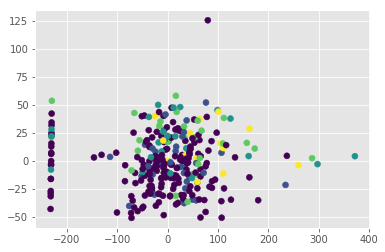

In [57]:
top_two_comp = pca_df[['pca2']]
top_one_comp = pca_df[['pca1']]# taking first and second principal component
print(top_one_comp.shape)
print(y.shape)
c1=[0,1]
plt.scatter(pca_result[:,0],pca_result[:,1],c=y)
#plt.scatter(top_two_comp,y,marker='^',c=y)
plt.show()

(294, 4)


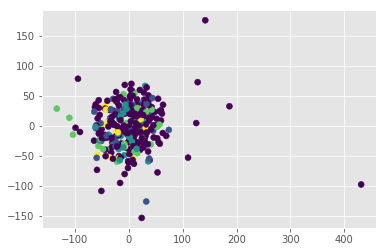

In [58]:
from sklearn.manifold import TSNE
tsne = TSNE(method='exact',n_components=4).fit_transform(x)
print(tsne.shape)
plt.scatter(tsne[:,1],tsne[:,0],c=y)
#plt.scatter(tsne[:,0],y,c=y)
plt.show()

In [0]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=1)
xlda_train = lda.fit_transform(x_train, y_train)
xlda_test = lda.transform(x_test)

In [60]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier()

classifier.fit(xlda_train, y_train)
y_pred = classifier.predict(xlda_test)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' + str(accuracy_score(y_test, y_pred)))

[[31  2  0  5  0]
 [ 5  0  1  0  3]
 [ 1  3  0  2  0]
 [ 3  2  0  0  0]
 [ 0  0  0  1  0]]
Accuracy0.5254237288135594


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [61]:
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
listacc=list()
for i in range(1,13):
  pca = PCA(n_components=i)
  xpca_train = pca.fit_transform(x_train)
  xpca_test = pca.transform(x_test)
  classifier.fit(xpca_train, y_train)
  y_pred = classifier.predict(xpca_test)
  acc=accuracy_score(y_test, y_pred)
  listacc.append(acc)
#explained_variance = pca.explained_variance_ratio_
#print(explained_variance)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


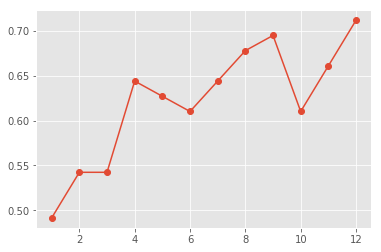

In [62]:
plt.plot(range(1,13),listacc,marker='o')
plt.show()

In [63]:



# Predicting the Test set results

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' ,accuracy_score(y_test, y_pred))

[[37  0  1  0  0]
 [ 4  3  2  0  0]
 [ 2  1  2  1  0]
 [ 5  0  0  0  0]
 [ 1  0  0  0  0]]
Accuracy 0.711864406779661


In [64]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
classifier = RandomForestClassifier()
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
listacc1=list()
for i in range(1,13):
  lda = LinearDiscriminantAnalysis(n_components=i)
  xlda_train = lda.fit_transform(x_train, y_train)
  xlda_test = lda.transform(x_test)
  classifier.fit(xlda_train, y_train)
  y_pred = classifier.predict(xlda_test)
  acc=accuracy_score(y_test, y_pred)
  listacc1.append(acc)
#explained_variance = pca.explained_variance_ratio_
#print(explained_variance)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(13, 5 - 1) = 4 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). 

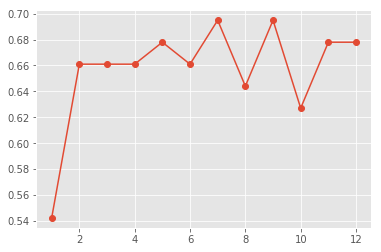

In [65]:
plt.plot(range(1,13),listacc1,marker='o')
plt.show()

In [66]:
from xgboost import XGBClassifier
xgb_clf = XGBClassifier()
xgb_clf.fit(x_train, y_train)
score = xgb_clf.score(x_test, y_test)
print(score)

0.6949152542372882


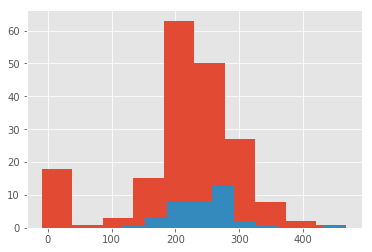

In [69]:
df.chol[df.num == 0].hist()
df.chol[df.num == 1].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7fd80b50f0>,
      dtype=object)

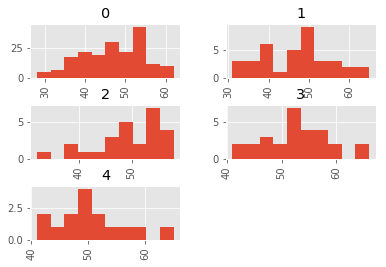

In [70]:
df.age.hist(by=df.num)

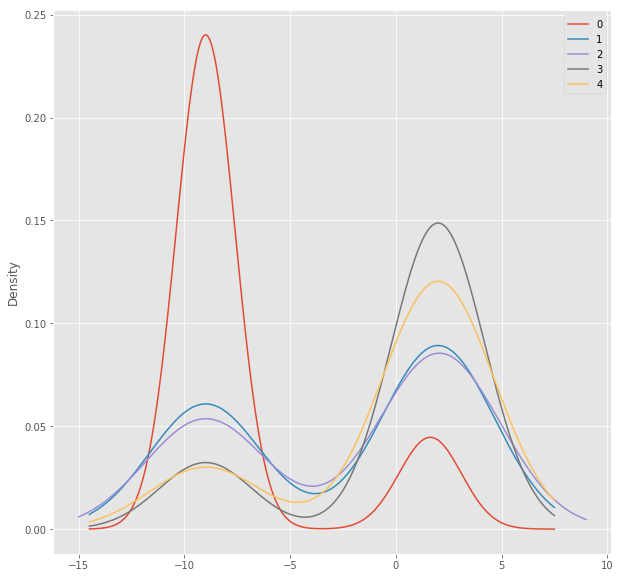

In [122]:
from matplotlib.pyplot import *
fig, ax = subplots()
df.groupby("num").slope.plot(kind='kde',ax=ax,figsize=(10,10))
ax.legend(['0','1','2','3','4'])

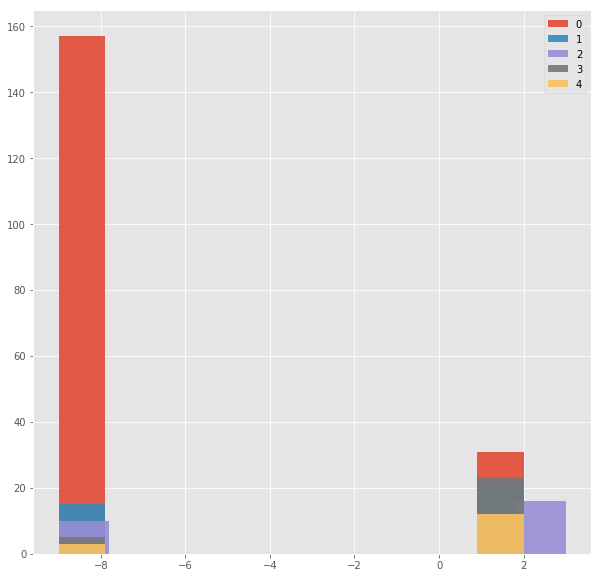

In [123]:
fig, ax = subplots()
df.groupby("num").slope.hist(alpha=0.9,ax=ax,figsize=(10,10))
ax.legend(['0','1','2','3','4'])

In [98]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,40,1,2,140,289,0,0,172,0,0.0,-9,-9,-9,0
1,49,0,3,160,180,0,0,156,0,1.0,2,-9,-9,1
2,37,1,2,130,283,0,1,98,0,0.0,-9,-9,-9,0
3,48,0,4,138,214,0,0,108,1,1.5,2,-9,-9,3
4,54,1,3,150,-9,0,0,122,0,0.0,-9,-9,-9,0
